## Image Classification with TensorFlow

## Application Part---
Our aim here will be the classification of flowers. We will use a previously prepared data set.

The determined flow will be as follows;

1- First examine and understand the dataset
2- Build an input pipeline
3- Create the model
4- Train the model
5- Test the model
6- Refine the model and repeat the process

## Import TensorFlow and other necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
#Tensorflow libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## First examin and understand the dataset

In [2]:
import pathlib
#Declare url
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#Create a file and download it with Keras utils
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
# get dataset path
data_dir = pathlib.Path(data_dir)

 ## if we want to look at the number of images downloaded;



In [3]:
#get image count
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total Images:",image_count)

Total Images: 3670


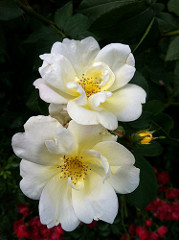

In [4]:
#get all images in rose file 
roses = list(data_dir.glob('roses/*'))
# show third image 
PIL.Image.open(str(roses[0]))

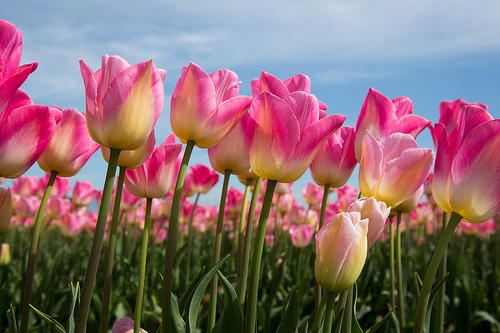

In [5]:
#get all images in tulips file
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

## Load and prepare dataset using Keras

In [6]:
# Batch size
batch_size = 32
# image height
img_height = 180
# image width
img_width = 180

In [7]:
# split dataset for train
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


## For Validation

In [8]:
# split dataset for validation
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names= train_ds.class_names  # to see class names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


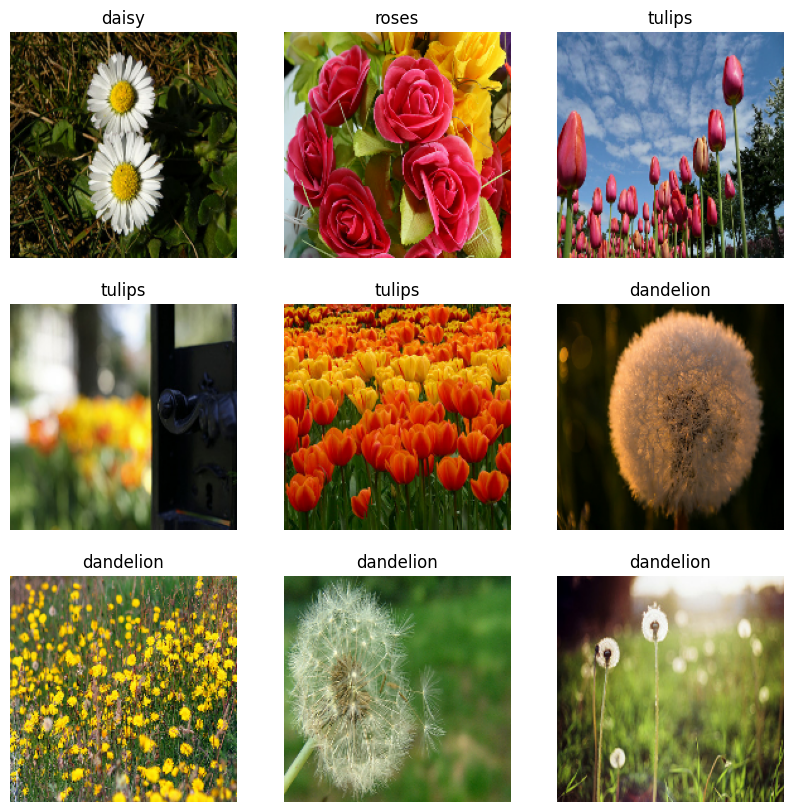

In [10]:
# determine figure size as 10 by 10
plt.figure(figsize=(10, 10))
# take image from train_ds
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    # plot image using imshow
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [12]:
#Create autotune object
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
# Create a normalization layer
normalization_layer = layers.Rescaling(1./255)

In [14]:
#normalize dataser using with norm. layer
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# sparete as image and label
image_batch, labels_batch = next(iter(normalized_ds))
# check the first image max and min value
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print("minumum value:",np.min(first_image), "maximum values: ",np.max(first_image))


minumum value: 0.0 maximum values:  0.99803925


## Create a Model:

In [15]:
# get class names
num_classes = len(class_names)

# build model layers
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile the Model

In [16]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary() # check the summery

# input shape of the model is 180x180 and 3 channel. Total prameters of model is 3,989,285

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

# now we can train the model

In [18]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 78s 819ms/step - loss: 1.3215 - accuracy: 0.4493 - val_loss: 1.0647 - val_accuracy: 0.5695
Epoch 2/10
92/92 [==============================] - 59s 636ms/step - loss: 0.9826 - accuracy: 0.6178 - val_loss: 0.9908 - val_accuracy: 0.5886
Epoch 3/10
92/92 [==============================] - 63s 681ms/step - loss: 0.7831 - accuracy: 0.7067 - val_loss: 0.9337 - val_accuracy: 0.6294
Epoch 4/10
92/92 [==============================] - 62s 677ms/step - loss: 0.5284 - accuracy: 0.8110 - val_loss: 1.0116 - val_accuracy: 0.6213
Epoch 5/10
92/92 [==============================] - 63s 690ms/step - loss: 0.3226 - accuracy: 0.8937 - val_loss: 1.1596 - val_accuracy: 0.6335
Epoch 6/10
92/92 [==============================] - 62s 677ms/step - loss: 0.1800 - accuracy: 0.9397 - val_loss: 1.3832 - val_accuracy: 0.6403
Epoch 7/10
92/92 [==============================] - 63s 682ms/step - loss: 0.1090 - accuracy: 0.9659 - val_loss: 1.5546 - val_accuracy: 0.6458

# Now visualize the result of the model
# Create plots of the loss and accuracy on the training and validation sets:

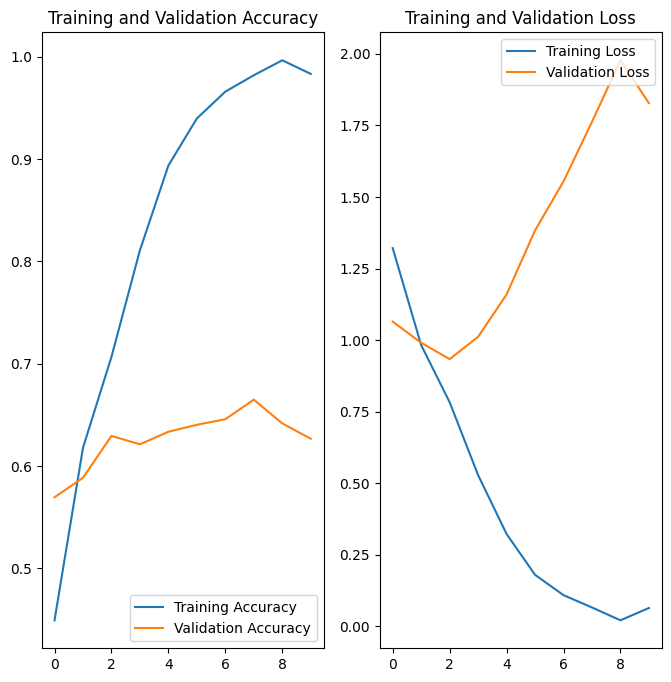

In [19]:
#get train accuracy in history
acc = history.history['accuracy']
#get validation accuracy
val_acc = history.history['val_accuracy']
# get train loss 
loss = history.history['loss']
#get validation loss
val_loss = history.history['val_loss']

epochs_range = range(epochs)
# plot accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# create augmentation sequentions
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

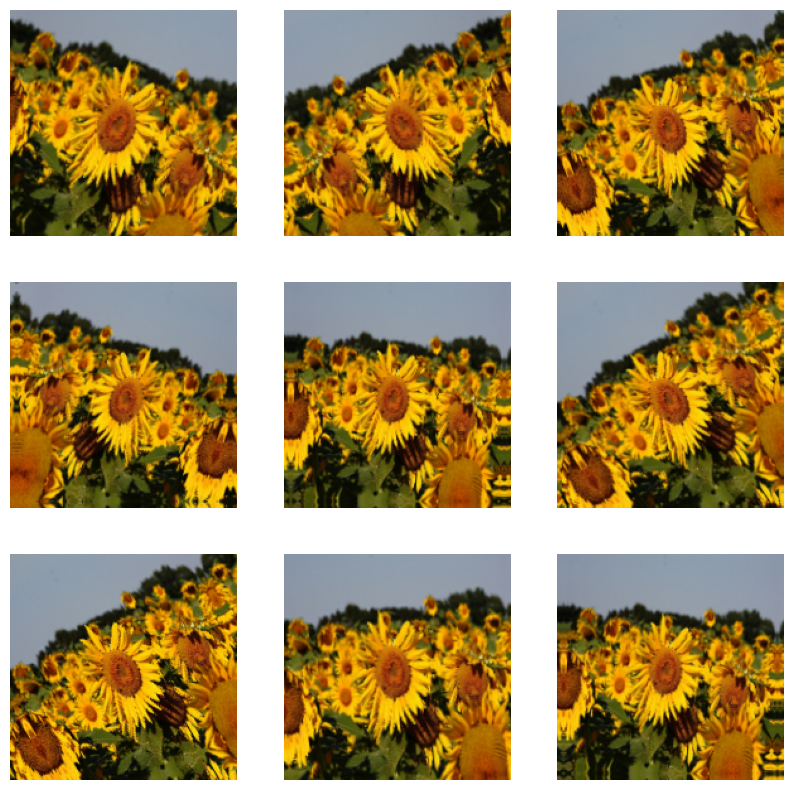

In [21]:
plt.figure(figsize=(10, 10))
#take second image in train dataset
for images, _ in train_ds.take(2):
  for i in range(9):
    #implement augmentation
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [22]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

## Again compile and train the model

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [25]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 76s 812ms/step - loss: 1.3376 - accuracy: 0.4257 - val_loss: 1.1257 - val_accuracy: 0.5368
Epoch 2/15
92/92 [==============================] - 76s 827ms/step - loss: 1.0836 - accuracy: 0.5555 - val_loss: 1.0194 - val_accuracy: 0.5831
Epoch 3/15
92/92 [==============================] - 76s 828ms/step - loss: 0.9892 - accuracy: 0.6039 - val_loss: 1.0008 - val_accuracy: 0.6104
Epoch 4/15
92/92 [==============================] - 73s 797ms/step - loss: 0.8939 - accuracy: 0.6533 - val_loss: 1.0451 - val_accuracy: 0.5954
Epoch 5/15
92/92 [==============================] - 76s 822ms/step - loss: 0.8604 - accuracy: 0.6744 - val_loss: 0.8753 - val_accuracy: 0.6730
Epoch 6/15
92/92 [==============================] - 75s 817ms/step - loss: 0.8216 - accuracy: 0.6802 - val_loss: 0.8407 - val_accuracy: 0.6771
Epoch 7/15
92/92 [==============================] - 74s 810ms/step - loss: 0.7752 - accuracy: 0.7071 - val_loss: 0.8046 - val_accuracy: 0.6812

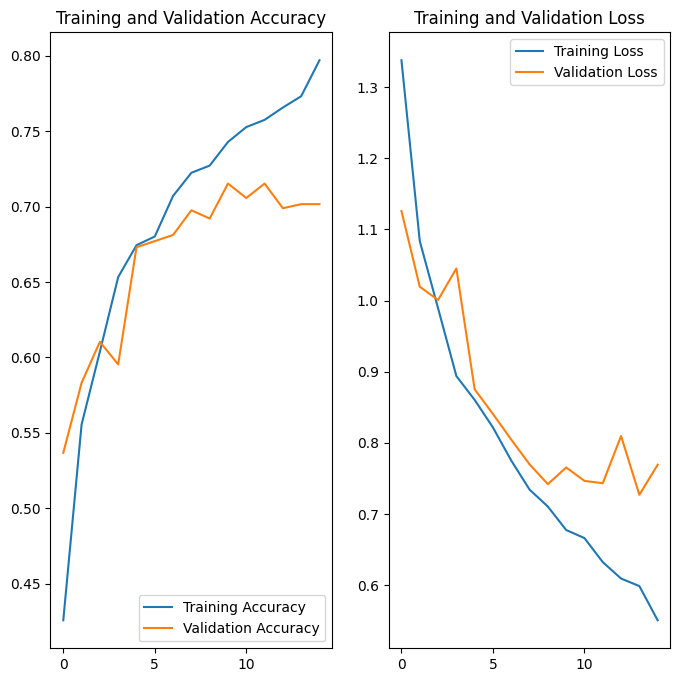

In [26]:
#get train accuracy in history
acc = history.history['accuracy']
#get validation accuracy
val_acc = history.history['val_accuracy']
# get train loss 
loss = history.history['loss']
#get validation loss
val_loss = history.history['val_loss']

epochs_range = range(epochs)
# plot accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()